In [5]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, random_state=41, n_classes=2, n_clusters_per_class=1, hypercube=False, class_sep=20)

In [6]:
import matplotlib.pyplot as plt

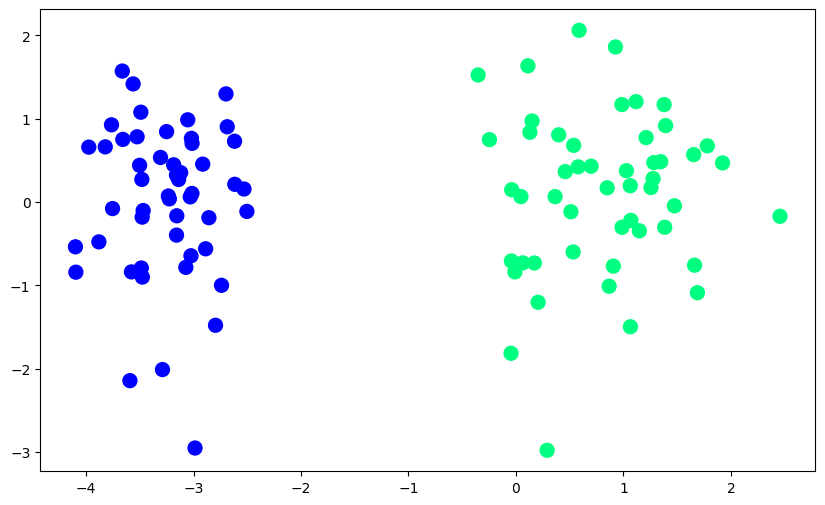

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [11]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [12]:
print(lor.intercept_)
print(lor.coef_)

[5.75632972]
[[4.78565215 0.20640307]]


# Getting slope and intercept from sklearn model

In [13]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [15]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)  # Add Bias Term
    weights = np.ones(X.shape[1]) # Initialize Weights
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights)) # Step 3
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0]) #Step: 4 -> Update Weights (Gradient Descent Rule)

    return weights[1:],weights[0]


# Step 3

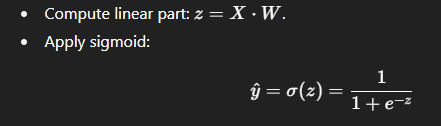

# Step 4

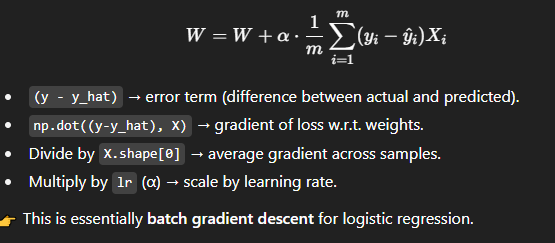

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [17]:
coef_,intercept_ = gd(X,y)

In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

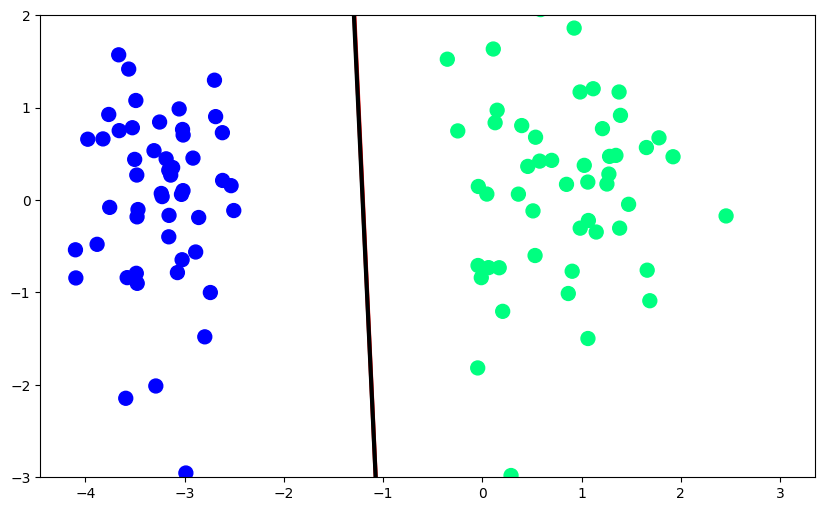

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)